In [1]:
import sys
from pathlib import Path

import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

work_path = Path(next((p for p in Path("__file__").resolve().parents if p.name == "Research"), None))
torchlib_path = str(work_path / Path("app/torch_libs"))
sys.path.append(torchlib_path)

from run_manager import RunManager, RunsManager, RunViewer

exp_dirs = ["./exp_single_2", "./exp_single_4", "./exp_single_8", "./exp_single_16", "./exp_single_32"] 
# exp_dirs = ["./exp_4", "./exp_8", "./exp_16", "./exp_32", "./exp_64"] 
exp_dirs += ["./exp_udata_2", "./exp_udata_4", "./exp_udata_8", "./exp_udata_16", "./exp_udata_32"]

df = None

for exp_dir in exp_dirs:
    rv = RunViewer(exp_path=exp_dir)
    df_org = rv.fetch_stats()
    if df is None:
        df = df_org
    else:
        df = pl.concat([df, df_org], how="vertical")
        
df = df.select(pl.exclude("run_id")).with_row_index("run_id")
display(df)



ModuleNotFoundError: No module named 'run_manager'

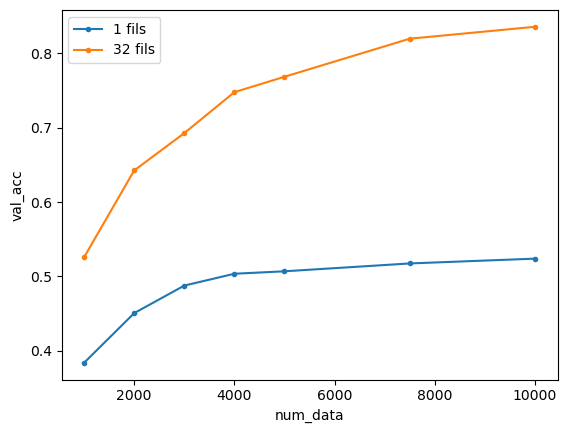

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False)

# df_ext = df.filter(pl.col("fils").is_in([1, 32]))
df_ext = df.filter((pl.col("ensembles") == 1) & (pl.col("fils").is_in([1, 32])))

df_piv = df_ext.pivot(values="val_acc", index="num_data", columns="fils", aggregate_function="mean").sort(by="num_data")

ser_x = df_piv[df_piv.columns[0]]
df_y = df_piv[df_piv.columns[1:]]

for ser_fil in df_y.iter_columns():
    ax[0][0].set_xlabel("num_data")
    ax[0][0].set_ylabel("val_acc")
    ax[0][0].plot(ser_x, ser_fil, label=ser_fil.name + " fils", marker=".")
    ax[0][0].legend()
    
fig.show()

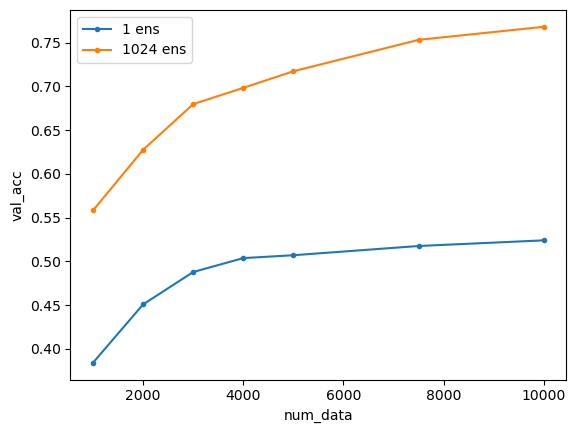

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False)

df_ext = df.filter((pl.col("fils") == 1) & (pl.col("ensembles").is_in([1, 1024])))

df_piv = df_ext.pivot(values="val_acc", index="num_data", columns="ensembles", aggregate_function="mean").sort(by="num_data")

ser_x = df_piv[df_piv.columns[0]]
df_y = df_piv[df_piv.columns[1:]]

for ser_fil in df_y.iter_columns():
    ax[0][0].set_xlabel("num_data")
    ax[0][0].set_ylabel("val_acc")
    ax[0][0].plot(ser_x, ser_fil, label=ser_fil.name + " ens", marker=".")
    ax[0][0].legend()
    
fig.show()